1. **Load the dataset**

In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')
dc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dc.csv')
dn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dn.csv')

Mounted at /content/drive


2. **Basic Glimpse of the dataset**

In [ ]:
print(dn.head())
print(dc.head())

   Unnamed: 0                                               text  \
0           0     Is it possible for me to change my PIN number?   
1           1               I'm not sure why my card didn't work   
2           2                     I don't think my top up worked   
3           3  Can you explain why my payment was charged a fee?   
4           4  How long does a transfer from a UK account tak...   

                                  category  k  \
0                               change_pin  0   
1                    declined_card_payment  0   
2                            top_up_failed  0   
3                 card_payment_fee_charged  0   
4  balance_not_updated_after_bank_transfer  0   

                                         l   l'  \
0                               change_pin  NaN   
1                    declined_card_payment  NaN   
2                            top_up_failed  NaN   
3                 card_payment_fee_charged  NaN   
4  balance_not_updated_after_bank_transfe

3. **So, start to play**
- Load the dataset (finished)
- Extract the true label probabilities for each epoch.
- Plot the progression of these probabilities.

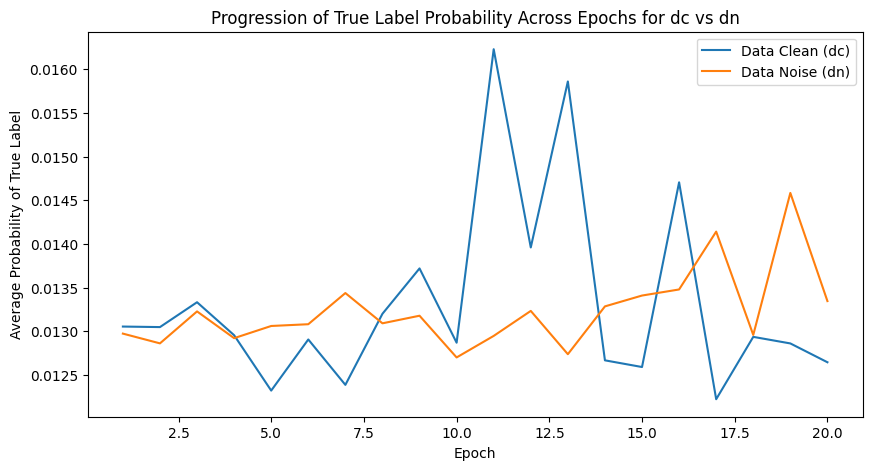

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ast

# Define the categories from Banking77
all_labels = [
    "activate_my_card", "age_limit", "apple_pay_or_google_pay", "atm_support",
    "automatic_top_up", "balance_not_updated_after_bank_transfer",
    "balance_not_updated_after_cheque_or_cash_deposit", "beneficiary_not_allowed",
    "cancel_transfer", "card_about_to_expire", "card_acceptance", "card_arrival",
    "card_delivery_estimate", "card_linking", "card_not_working",
    "card_payment_fee_charged", "card_payment_not_recognised",
    "card_payment_wrong_exchange_rate", "card_swallowed", "cash_withdrawal_charge",
    "cash_withdrawal_not_recognised", "change_pin", "compromised_card",
    "contactless_not_working", "country_support", "declined_card_payment",
    "declined_cash_withdrawal", "declined_transfer",
    "direct_debit_payment_not_recognised", "disposable_card_limits",
    "edit_personal_details", "exchange_charge", "exchange_rate",
    "exchange_via_app", "extra_charge_on_statement", "failed_transfer",
    "fiat_currency_support", "get_disposable_virtual_card", "get_physical_card",
    "getting_spare_card", "getting_virtual_card", "lost_or_stolen_card",
    "lost_or_stolen_phone", "order_physical_card", "passcode_forgotten",
    "pending_card_payment", "pending_cash_withdrawal", "pending_top_up",
    "pending_transfer", "pin_blocked", "receiving_money", "Refund_not_showing_up",
    "request_refund", "reverted_card_payment?", "supported_cards_and_currencies",
    "terminate_account", "top_up_by_bank_transfer_charge", "top_up_by_card_charge",
    "top_up_by_cash_or_cheque", "top_up_failed", "top_up_limits", "top_up_reverted",
    "topping_up_by_card", "transaction_charged_twice", "transfer_fee_charged",
    "transfer_into_account", "transfer_not_received_by_recipient", "transfer_timing",
    "unable_to_verify_identity", "verify_my_identity", "verify_source_of_funds",
    "verify_top_up", "virtual_card_not_working", "visa_or_mastercard",
    "why_verify_identity", "wrong_amount_of_cash_received", "wrong_exchange_rate_for_cash_withdrawal"
]
label_to_index = {label: index for index, label in enumerate(all_labels)}

# Function to extract the probabilities for the true label for each epoch
def extract_true_label_probabilities(df, label_to_index):
    epoch_probabilities = {epoch: [] for epoch in range(1, 21)}

    for _, row in df.iterrows():
        true_label = row['category']
        true_label_index = label_to_index.get(true_label)
        if true_label_index is not None:
            for epoch in range(1, 21):
                epoch_col_name = f'Epoch_{epoch}'
                epoch_prob_list = ast.literal_eval(row[epoch_col_name])
                epoch_probabilities[epoch].append(epoch_prob_list[true_label_index])

    avg_probabilities = [np.mean(epoch_probabilities[epoch]) for epoch in range(1, 21)]
    return avg_probabilities

# Extract probabilities
dc_probabilities = extract_true_label_probabilities(dc, label_to_index)
dn_probabilities = extract_true_label_probabilities(dn, label_to_index)

# Plotting
epochs = range(1, 21)
plt.figure(figsize=(10, 5))
plt.plot(epochs, dc_probabilities, label='Data Clean (dc)')
plt.plot(epochs, dn_probabilities, label='Data Noise (dn)')
plt.xlabel('Epoch')
plt.ylabel('Average Probability of True Label')
plt.title('Progression of True Label Probability Across Epochs for dc vs dn')
plt.legend()
plt.show()

The graph above is aggregating average probabilities across all texts within each dataset and compare them.

But I don't see any valuable message here, so I want to plot the common text shared in Dc and Dn to plot separetly.

In [ ]:
import matplotlib.pyplot as plt

def extract_individual_probabilities(df, label_to_index):
    # Initialize a dictionary to store probabilities by text input
    text_to_probabilities = {}
    for _, row in df.iterrows():
        text = row['text']
        true_label = row['category']
        true_label_index = label_to_index.get(true_label, -1)
        if true_label_index != -1:
            probabilities = []
            for epoch in range(1, 21):
                epoch_col_name = f'Epoch_{epoch}'
                epoch_probs = ast.literal_eval(row[epoch_col_name])
                probabilities.append(epoch_probs[true_label_index])
            text_to_probabilities[text] = probabilities
    return text_to_probabilities

# Extract probabilities for each dataset
dc_probs = extract_individual_probabilities(dc, label_to_index)
dn_probs = extract_individual_probabilities(dn, label_to_index)

# Plotting individual progressions for the first 10 common texts
common_texts = list(set(dc_probs.keys()).intersection(set(dn_probs.keys())))
epochs = list(range(1, 21))
plot_count = 0

for text in common_texts:
    if plot_count < 10:  # Limit to first 10 plots
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, dc_probs[text], label='Data Clean (dc)')
        plt.plot(epochs, dn_probs[text], label='Data Noise (dn)')
        plt.xlabel('Epoch')
        plt.ylabel('Probability of True Label')
        plt.title(f'Progression of True Label Probability Across Epochs for Text: {text[:50]}...')
        plt.legend()
        plt.show()
        plot_count += 1
    else:
        break

Weird, No graph plotted. Maybe there is no common text?

In [ ]:
# Assuming all prior setup and function definitions are correct
common_texts = list(set(dc_probs.keys()).intersection(set(dn_probs.keys())))  # Finding the intersaction
print(f"Number of common texts: {len(common_texts)}")  # Debugging line

epochs = list(range(1, 21))
plot_count = 0

for text in common_texts:
    if plot_count < 10:  # Limit to first 10 plots
        print(f"Plotting for text: {text[:50]}")  # Debugging line
        print(f"DC Probs: {dc_probs[text]}")  # Debugging line
        print(f"DN Probs: {dn_probs[text]}")  # Debugging line

        plt.figure(figsize=(10, 5))
        plt.plot(epochs, dc_probs[text], label='Data Clean (dc)')
        plt.plot(epochs, dn_probs[text], label='Data Noise (dn)')
        plt.xlabel('Epoch')
        plt.ylabel('Probability of True Label')
        plt.title(f'Progression of True Label Probability Across Epochs for Text: {text[:50]}...')
        plt.legend()
        plt.show()
        plot_count += 1


Number of common texts: 0


Well, There is no common text here. :(

So now I am trying to find whether the highest probability in the softmax layer would be high after removing the noise in the data.

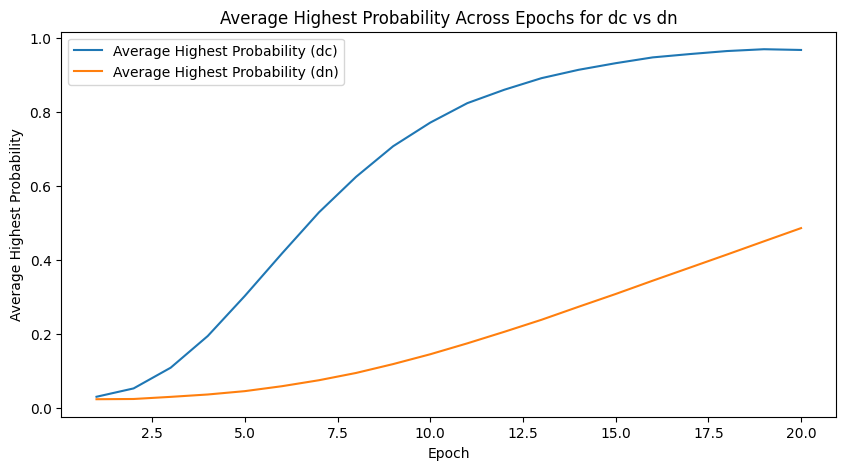

In [ ]:
def extract_highest_probabilities(df):
    epoch_highest_probs = {epoch: [] for epoch in range(1, 21)}

    for _, row in df.iterrows():
        for epoch in range(1, 21):
            epoch_col_name = f'Epoch_{epoch}'
            epoch_probs = ast.literal_eval(row[epoch_col_name])
            highest_prob = max(epoch_probs)  # Get the highest probability
            epoch_highest_probs[epoch].append(highest_prob)

    avg_highest_probs = [np.mean(epoch_highest_probs[epoch]) for epoch in range(1, 21)]
    return avg_highest_probs

# Extract the average of the highest probabilities for each epoch
dc_highest_avg_probs = extract_highest_probabilities(dc)
dn_highest_avg_probs = extract_highest_probabilities(dn)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, dc_highest_avg_probs, label='Average Highest Probability (dc)')
plt.plot(epochs, dn_highest_avg_probs, label='Average Highest Probability (dn)')
plt.xlabel('Epoch')
plt.ylabel('Average Highest Probability')
plt.title('Average Highest Probability Across Epochs for dc vs dn')
plt.legend()
plt.show()

Damn, What if the the highest probability is a wrong prediction?

Remove them and do it again!

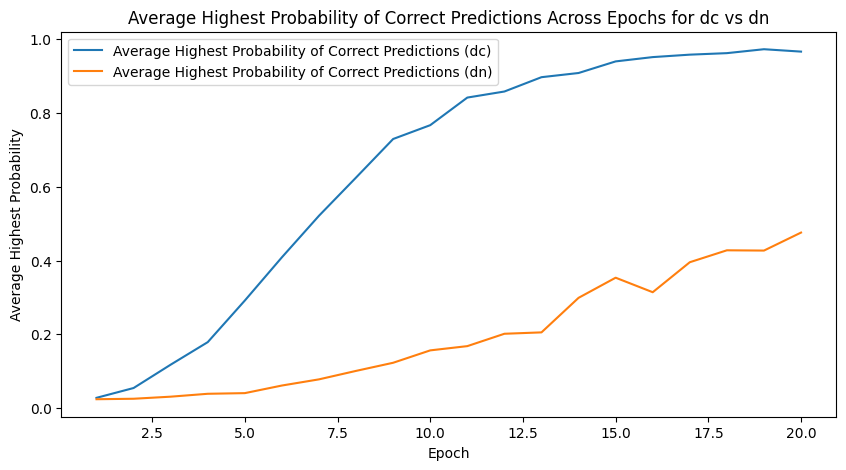

In [ ]:
def extract_correct_predictions_average_probabilities(df, label_to_index):
    epoch_correct_probs = {epoch: [] for epoch in range(1, 21)}

    for _, row in df.iterrows():
        true_label = row['category']
        true_label_index = label_to_index.get(true_label, -1)
        if true_label_index != -1:  # Ensure true label exists in our mapping
            for epoch in range(1, 21):
                epoch_col_name = f'Epoch_{epoch}'
                epoch_probs = ast.literal_eval(row[epoch_col_name])
                predicted_index = np.argmax(epoch_probs)  # Index of highest probability
                highest_prob = max(epoch_probs)  # Highest probability

                if predicted_index == true_label_index:  # Correct prediction
                    epoch_correct_probs[epoch].append(highest_prob)

    # Calculate the average of these highest probabilities for correct predictions per epoch
    avg_correct_probs = [np.mean(epoch_correct_probs[epoch]) if epoch_correct_probs[epoch] else 0 for epoch in range(1, 21)]
    return avg_correct_probs

# Assuming label_to_index is defined as before and dc, dn DataFrames are loaded
dc_correct_avg_probs = extract_correct_predictions_average_probabilities(dc, label_to_index)
dn_correct_avg_probs = extract_correct_predictions_average_probabilities(dn, label_to_index)

# Plotting
epochs = list(range(1, 21))
plt.figure(figsize=(10, 5))
plt.plot(epochs, dc_correct_avg_probs, label='Average Highest Probability of Correct Predictions (dc)')
plt.plot(epochs, dn_correct_avg_probs, label='Average Highest Probability of Correct Predictions (dn)')
plt.xlabel('Epoch')
plt.ylabel('Average Highest Probability')
plt.title('Average Highest Probability of Correct Predictions Across Epochs for dc vs dn')
plt.legend()
plt.show()

Summary:
* The clean data (dc) leads to higher confidence in correct predictions across all epochs compared to the noisy data (dn).
* The confidence for the clean data rises quickly and then converage, suggesting the model quickly learns from clean data and then stabilizes.
* The confidence for the noisy data increases more slowly, indicating that while the model is still learning and improving, the noise in the data is likely impacting its learning efficiency.

Overall, the plot demonstrates the importance of clean data for model training and suggests that data quality significantly affects the model's performance.